In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
from subprocess import check_output
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

## CLEANING DATA


In [199]:
df_pokemon = pd.read_csv('dataset/Pokemon.csv', index_col=0)
df_pokemon.shape

(800, 12)

In [200]:
df_pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [201]:
pd.DataFrame(df_pokemon['Name'].unique().tolist(), columns=['Pokemon'])

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
...,...
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined
798,HoopaHoopa Unbound


In [202]:
df_pokemon.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [203]:
print(len(df_pokemon.isnull().any()))
df_pokemon.isnull().any()

12


Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [204]:
df_pokemon['Type 2'].replace(np.nan, '0', inplace=True)
df_pokemon.rename(columns = {'Type 1':'Type_1', 'Type 2':'Type_2'}, inplace = True) #Mengubah nama columns agar dapat digunakan lebih mudah


In [205]:
df_pokemon['Type_2'].head(10)

#
1    Poison
2    Poison
3    Poison
3    Poison
4         0
5         0
6    Flying
6    Dragon
6    Flying
7         0
Name: Type_2, dtype: object

In [206]:
print(str(df_pokemon['Name'].nunique()))

800


In [207]:
gen_1 = df_pokemon[df_pokemon.Generation == 1] # Mencari data pokemon dari gen1


In [208]:
df_gen1 = gen_1['Type_1'] # Mrncari Data Tipe Pertama Pokemon
df_gen1.value_counts() 

Water       31
Normal      24
Fire        14
Bug         14
Poison      14
Grass       13
Psychic     11
Rock        10
Electric     9
Ground       8
Fighting     7
Ghost        4
Dragon       3
Fairy        2
Ice          2
Name: Type_1, dtype: int64

## Mengolah Data

In [209]:
explode = np.arange(len(df_gen1.unique())) * 0.02
explode


array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28])

Text(0, 0.5, '')

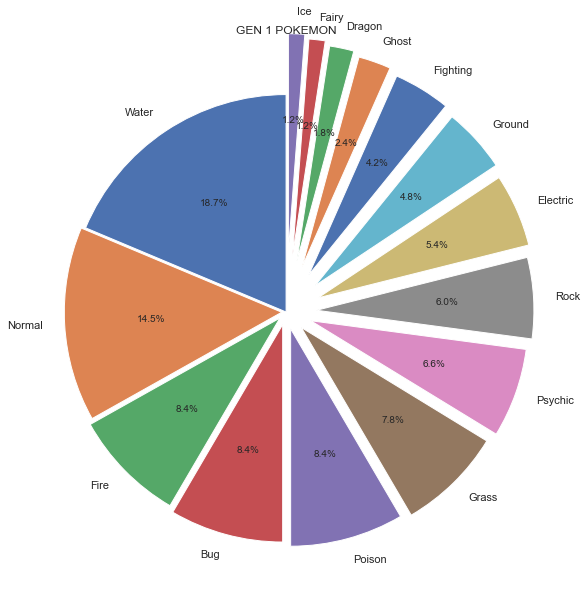

In [210]:

df_gen1.value_counts().plot.pie(
    explode = explode,
    autopct = '%1.1f%%',
    shadow=False,
    startangle=90,
    figsize=(10, 10)
)
plt.title('GEN 1 POKEMON')
plt.xlabel('')
plt.ylabel('')




Dari data di atas pokemon terbanyak di gen 1 adalah pokemon dengan tipe Water


In [211]:
gen_2 = df_pokemon[df_pokemon.Generation == 2]
df_gen2 = gen_2['Type_1']
df_gen2.value_counts()

Water       18
Normal      15
Bug         12
Grass        9
Fire         8
Electric     7
Psychic      7
Dark         6
Fairy        5
Rock         5
Ice          4
Ground       3
Steel        3
Fighting     2
Poison       1
Ghost        1
Name: Type_1, dtype: int64

In [212]:
explode2 = np.arange(len(df_gen2.unique())) * 0.02
explode2

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 ])

Text(0, 0.5, '')

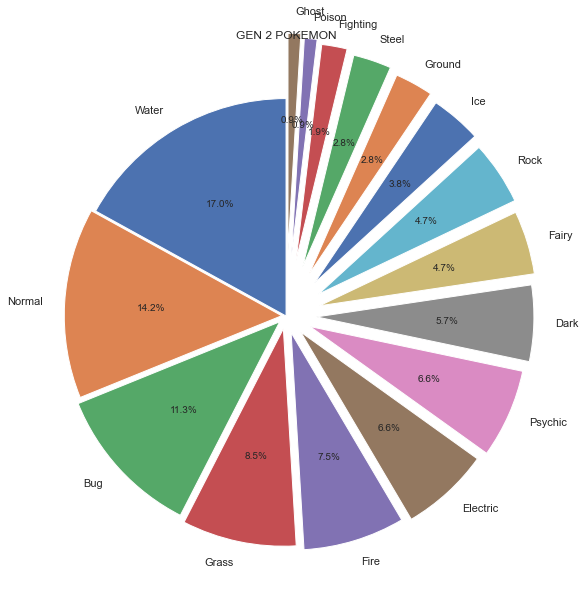

In [213]:

df_gen2.value_counts().plot.pie(
    explode = explode2,
    autopct = '%1.1f%%',
    shadow=False,
    startangle=90,
    figsize=(10, 10)
)
plt.title('GEN 2 POKEMON')
plt.xlabel('')
plt.ylabel('')


Dari data diatas bahwa pokemon dengan tipe Water merupakan tipe terbanyak dalam pokemon Gen 2


## Mencari Berapa Persen Pokemon Legendary


In [214]:
legendary_gen1 = gen_1.groupby('Legendary').size()
legendary_gen1
df_legendary1 = gen_1['Legendary']
explode3 = np.arange(len(df_legendary1.unique())) * 0.02
explode3

array([0.  , 0.02])

Text(0.5, 1.0, 'LEGENDARY POKEMON GEN 1')

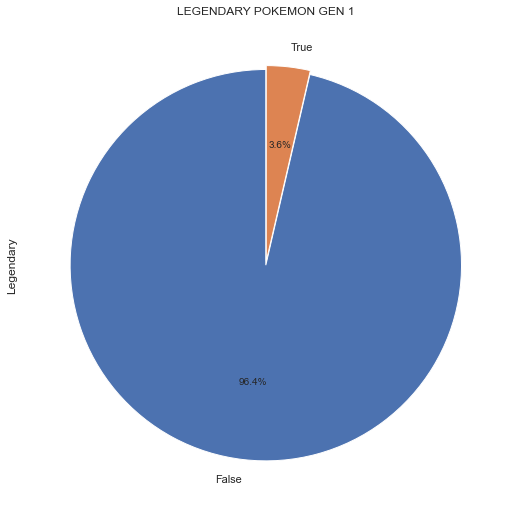

In [215]:
df_legendary1.value_counts().plot.pie(
    explode = explode3,
    autopct = '%1.1f%%',
    shadow = False,
    startangle = 90,
    figsize = (9, 9)
)
plt.title('LEGENDARY POKEMON GEN 1')

Dari semua pokemon di gen 1 hanya 3.6% Pokemon Legendary

In [216]:
legendary_gen2 = gen_2.groupby('Legendary').size()
legendary_gen2
df_legendary2 = gen_2['Legendary']
explode5 = np.arange(len(df_legendary2.unique())) * 0.02
explode5

array([0.  , 0.02])

Text(0.5, 1.0, 'LEGENDARY POKEMON GEN 2')

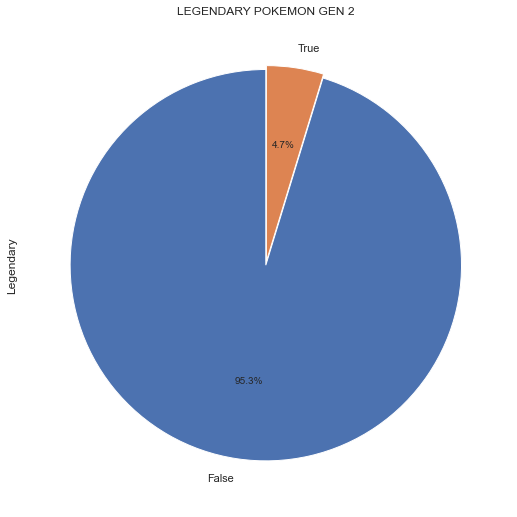

In [217]:
df_legendary2.value_counts().plot.pie(
    explode = explode5,
    autopct = '%1.1f%%',
    shadow = False,
    startangle = 90,
    figsize = (9, 9)
)
plt.title('LEGENDARY POKEMON GEN 2')

Dari semua pokemon di gen 2 hanya 4.7% Pokemon Legendary

<AxesSubplot:title={'center':'LEGENDARY POKEMON'}, ylabel='Legendary'>

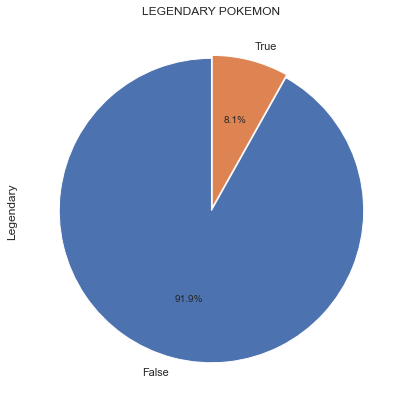

In [218]:
df_legendary = df_pokemon['Legendary']
explode4 = np.arange(len(df_legendary.unique())) * 0.02
df_legendary.value_counts().plot.pie(
    explode=explode4,
    title="LEGENDARY POKEMON",
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
    figsize=(7,7)
)

Dari keseluruhan pokemon hanya 8.1% Pokemon Legendary

## Perbandingan Antara Gen 1 Dan Gen 2



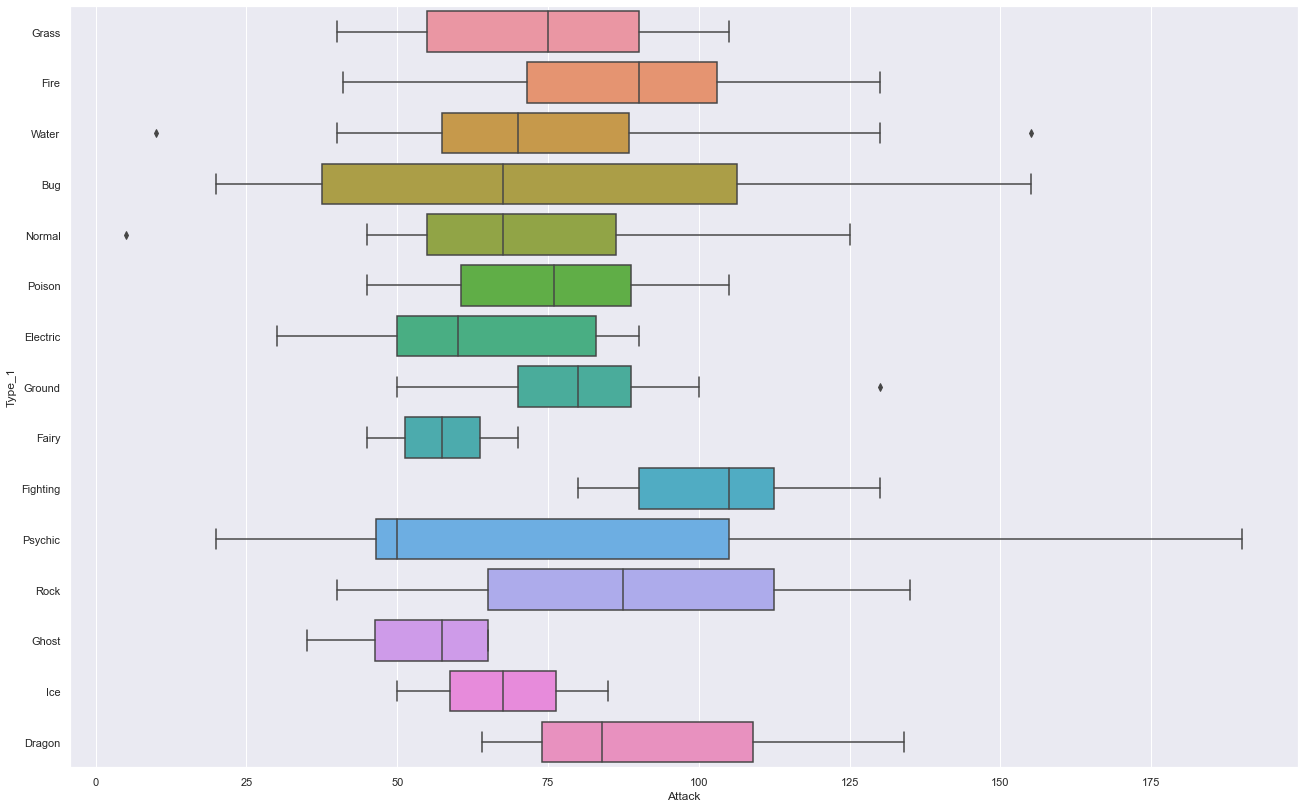

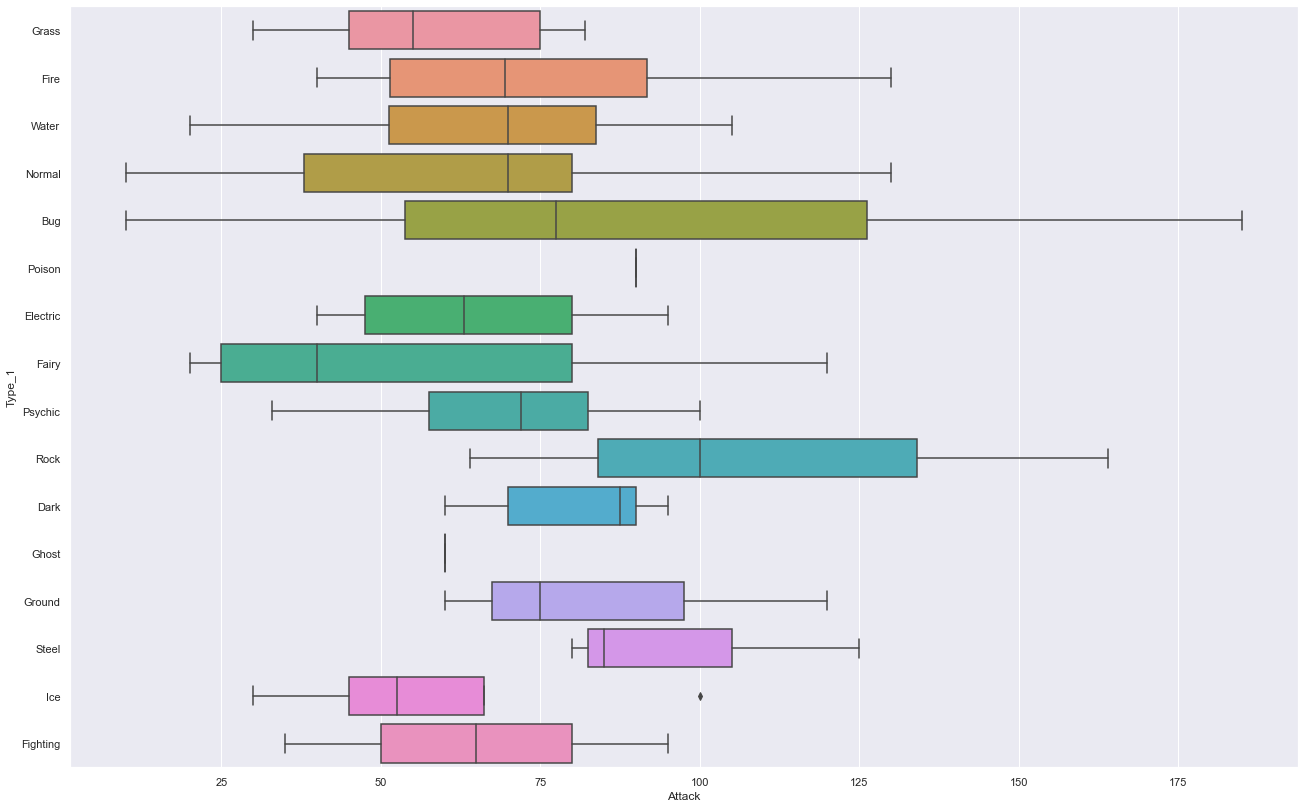

In [219]:
sns.set()
plt.figure(figsize=(22, 14))
ax = sns.boxplot(x='Attack', y='Type_1', data=gen_1)
plt.xcorr
plt.figure(figsize=(22, 14))
lx = sns.boxplot(x='Attack', y='Type_1', data=gen_2)

Dari data di atas dapat disimpulkan bahwa kekuatan terbesar dalam kedua gen tersebut adalah tipe Psychic dan Bug

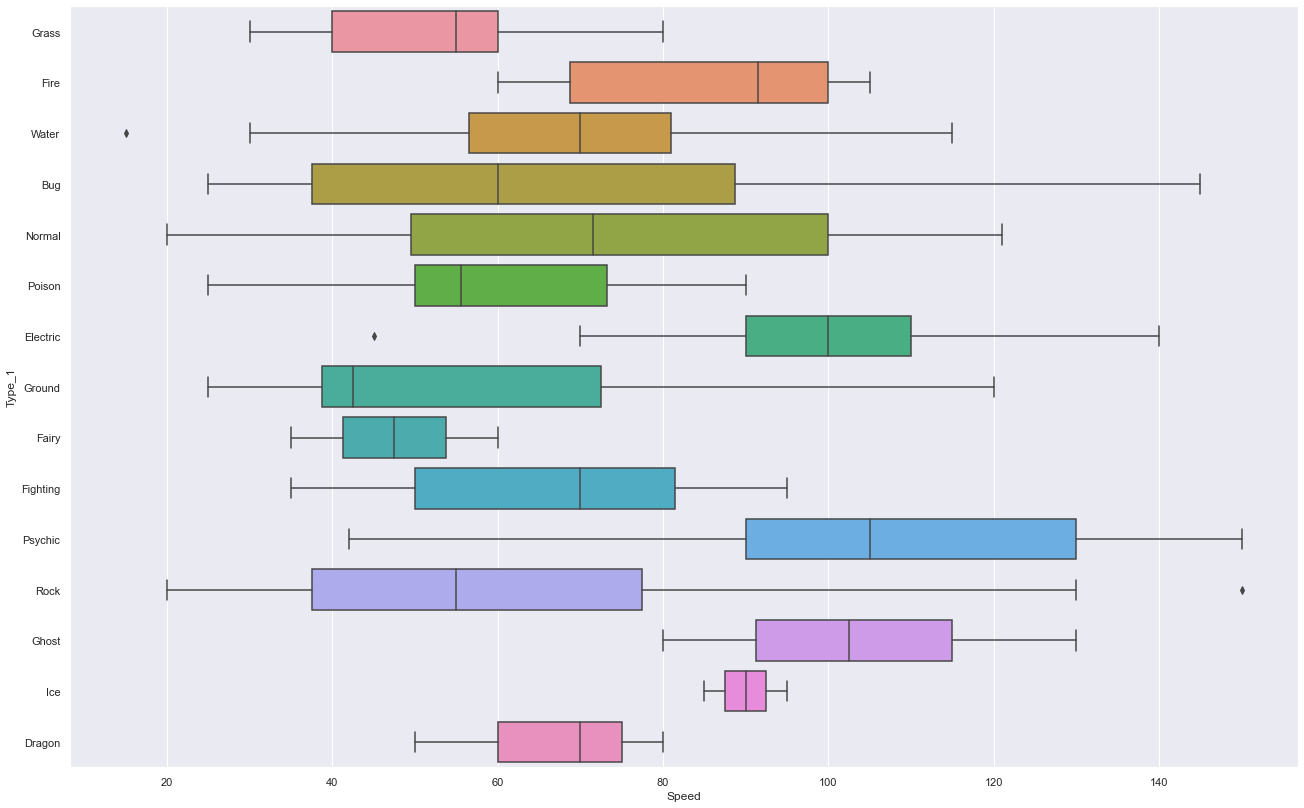

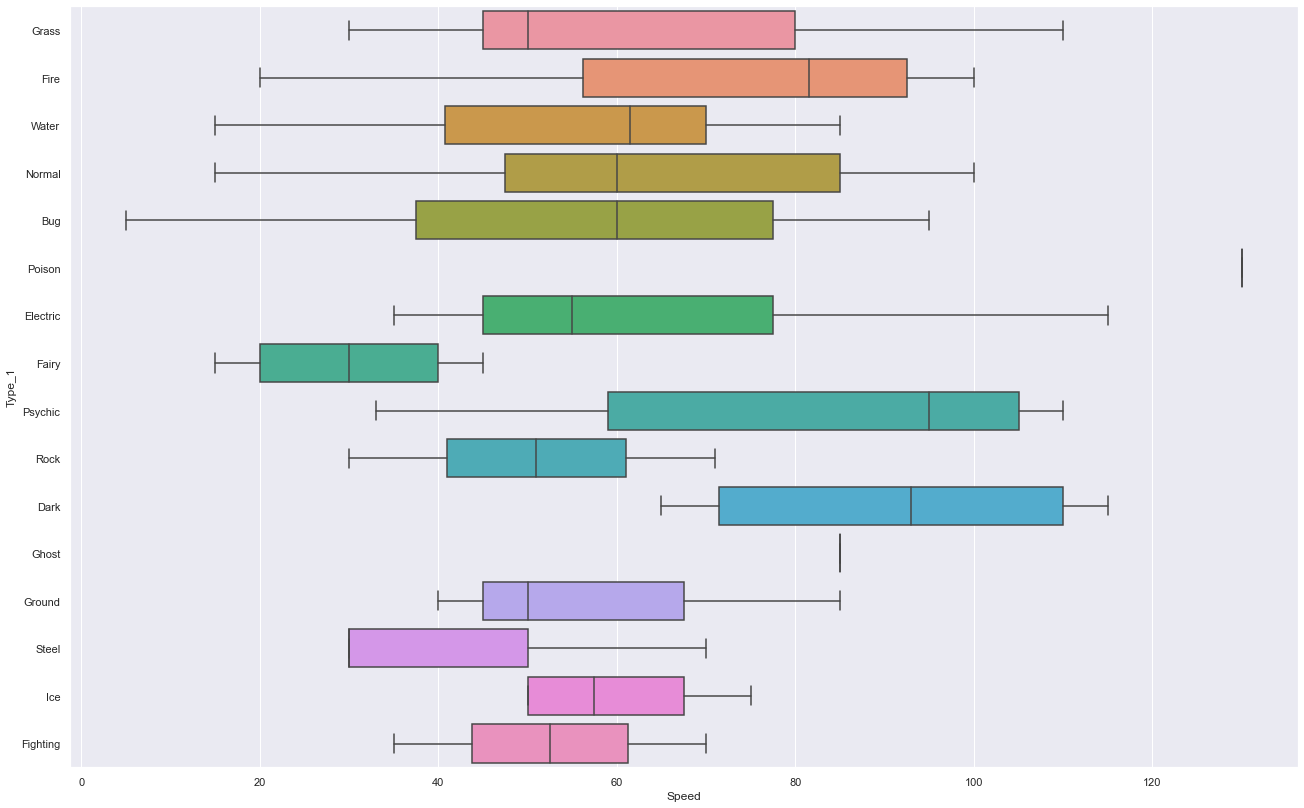

In [220]:
sns.set()
plt.figure(figsize=(22, 14))
ax = sns.boxplot(x='Speed', y='Type_1', data=gen_1)
plt.figure(figsize=(22, 14))
lx = sns.boxplot(x='Speed', y='Type_1', data=gen_2)
plt.show()

Dari data di atas kita bisa lihat bahwa dari kedua gen yang paling cepat adalah tipe pokemon Psychic, Electric dan Dark.

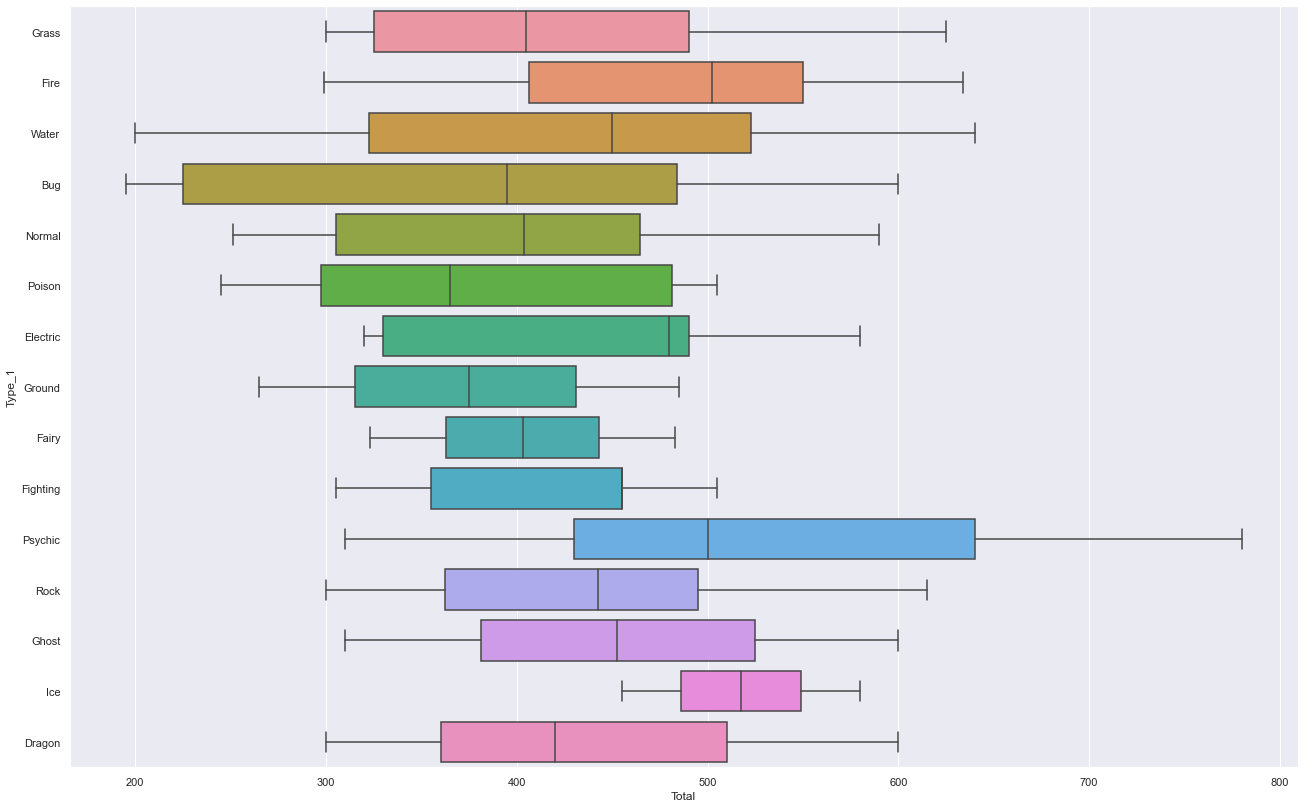

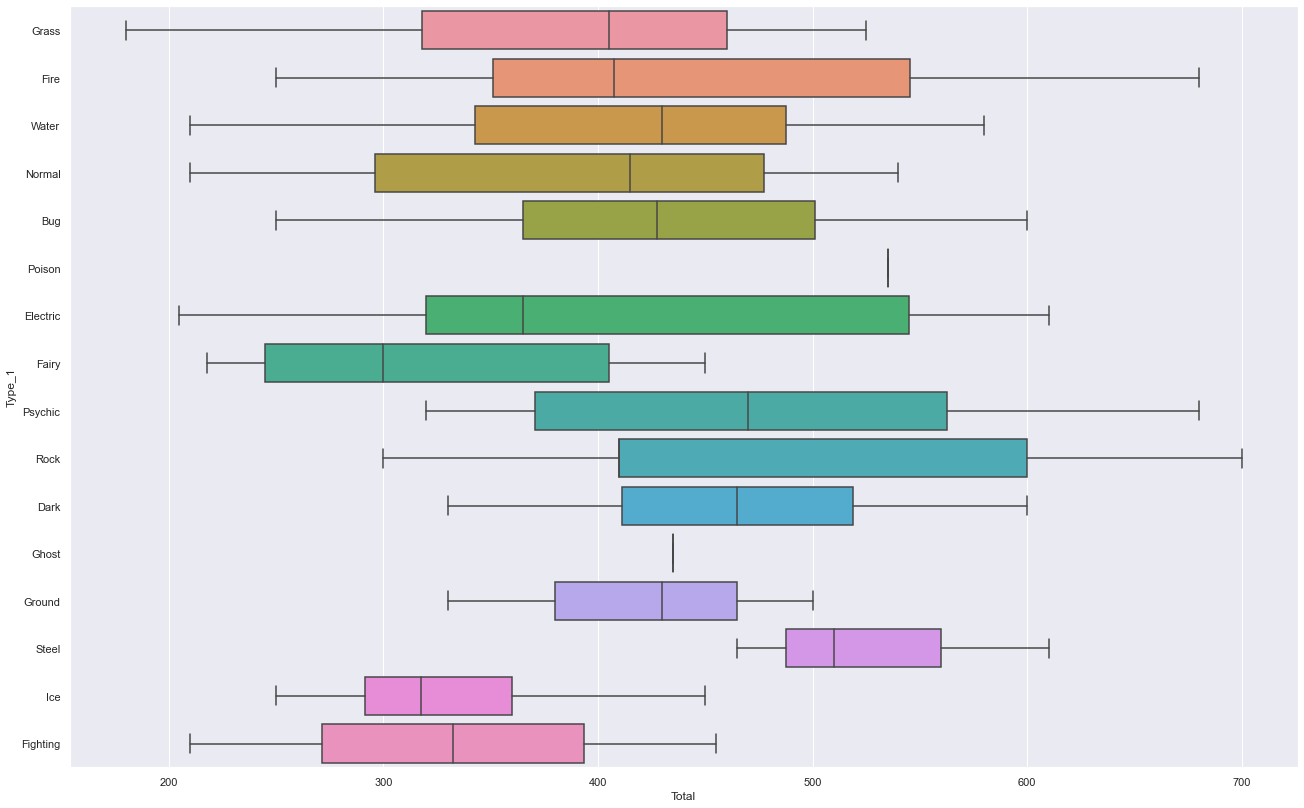

In [221]:
sns.set()
plt.figure(figsize=(22, 14))
ax = sns.boxplot(x='Total', y='Type_1', data=gen_1)
plt.figure(figsize=(22, 14))
lx = sns.boxplot(x='Total', y='Type_1', data=gen_2)
# Data 'Total' Merupakan dari gabungan semua data dari Kecepatan hinnga Pertahan Pokemon


Data diatas menunjukkan bahwa dari kedua generasi diatas tipe yang terbaik adalah Psychic dan Rock

## Kesimpulan Data


Dari yang bisa kita simpulkan bahwa dari generasi pertama dan kedua tipe pokemon Water merupakan tipe yang paling banyak. Dari segi kekuatan dan kecepatan pun tipe Psychic merupakan tipe terkuat dari semua tipe di gen pertama maupun gen ke dua. Pokemon dengan Title Legendary tidak sampai 10% apabila gen 1 dan 2 di gabungkan hanya tercapa 8,1%.